### EE399 HW4
### Xinqi Chen  May 7, 2023

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error


Github repository: https://github.com/Mmmo-C/Feed-Forward-Neural-Network-for-Image-Classification

#### Part 1

In [ ]:
# Fit to the model
X = np.arange(0, 31)
Y = np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41, 40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53])

model = keras.Sequential(
    [
        keras.layers.Dense(64, activation="relu", input_shape=(1,)),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dense(1),
    ]
)

model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss="mse")

model.fit(X, Y, epochs=1000)


Epoch 1/1000
1/1 [==============================] - 1s 906ms/step - loss: 1877.8240
Epoch 2/1000
1/1 [==============================] - 0s 11ms/step - loss: 1838.1027
Epoch 3/1000
1/1 [==============================] - 0s 12ms/step - loss: 1801.2139
Epoch 4/1000
1/1 [==============================] - 0s 14ms/step - loss: 1767.2086
Epoch 5/1000
1/1 [==============================] - 0s 12ms/step - loss: 1733.4911
Epoch 6/1000
1/1 [==============================] - 0s 9ms/step - loss: 1700.0531
Epoch 7/1000
1/1 [==============================] - 0s 11ms/step - loss: 1666.3910
Epoch 8/1000
1/1 [==============================] - 0s 13ms/step - loss: 1632.4857
Epoch 9/1000
1/1 [==============================] - 0s 11ms/step - loss: 1598.6549
Epoch 10/1000
1/1 [==============================] - 0s 13ms/step - loss: 1564.3318
Epoch 11/1000
1/1 [==============================] - 0s 11ms/step - loss: 1530.0756
Epoch 12/1000
1/1 [==============================] - 0s 9ms/step - loss: 1497.2112
Ep

In [ ]:
# Train the data set
X_train, Y_train = X[:20], Y[:20]
X_test, Y_test = X[20:], Y[20:]
model.fit(X_train, Y_train, epochs=1000)

# Evaluate the model on the training set
Y_train_pred = model.predict(X_train)
mse_train = mean_squared_error(Y_train, Y_train_pred)
print("MSE on training set:", mse_train)

# Evaluate the model on the test set
Y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(Y_test, Y_test_pred)
print("MSE on test set:", mse_test)

Epoch 1/1000
1/1 [==============================] - 0s 15ms/step - loss: 5.5831
Epoch 2/1000
1/1 [==============================] - 0s 10ms/step - loss: 5.2775
Epoch 3/1000
1/1 [==============================] - 0s 9ms/step - loss: 5.1663
Epoch 4/1000
1/1 [==============================] - 0s 13ms/step - loss: 5.3376
Epoch 5/1000
1/1 [==============================] - 0s 10ms/step - loss: 5.4275
Epoch 6/1000
1/1 [==============================] - 0s 10ms/step - loss: 5.2813
Epoch 7/1000
1/1 [==============================] - 0s 13ms/step - loss: 5.1218
Epoch 8/1000
1/1 [==============================] - 0s 12ms/step - loss: 5.1399
Epoch 9/1000
1/1 [==============================] - 0s 13ms/step - loss: 5.2387
Epoch 10/1000
1/1 [==============================] - 0s 10ms/step - loss: 5.2228
Epoch 11/1000
1/1 [==============================] - 0s 9ms/step - loss: 5.1048
Epoch 12/1000
1/1 [==============================] - 0s 8ms/step - loss: 5.0359
Epoch 13/1000
1/1 [=====================

In [ ]:
# Split the data into training and test sets
X_train = np.concatenate([X[:10], X[20:]])
Y_train = np.concatenate([Y[:10], Y[20:]])
X_test, Y_test = X[10:20], Y[10:20]

model.fit(X_train, Y_train, epochs=1000, verbose=0)

# Evaluate the model on the training set and the test set
Y_train_pred = model.predict(X_train)
mse_train = mean_squared_error(Y_train, Y_train_pred)
print("MSE on training set:", mse_train)

Y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(Y_test, Y_test_pred)
print("MSE on test set:", mse_test)

1/1 [==============================] - 0s 30ms/step
MSE on training set: 3.1167217045738305
1/1 [==============================] - 0s 35ms/step
MSE on test set: 8.819499679515138


In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA

# Load the MNIST dataset
mnist = fetch_openml("mnist_784")
X = mnist['data']
y = mnist['target']
print("Data loaded")

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Data loaded


#### Part 2

In [ ]:
# Compute the first 20 PCA modes
pca = PCA(n_components=20)
X_pca = pca.fit_transform(X)

# Print the explained variance ratio of each PCA mode
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.09746116 0.07155445 0.06149531 0.05403385 0.04888934 0.04305227
 0.03278262 0.02889642 0.02758364 0.0234214  0.02106689 0.02037553
 0.01707064 0.01694019 0.01583382 0.01486335 0.01319356 0.01279006
 0.01187212 0.01152878]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2)

# Preprocess the data by scaling it to [0, 1]
X_train /= 255
X_test /= 255

# Build the neural network model
model = MLPClassifier(hidden_layer_sizes=(128,), activation='relu', solver='adam', max_iter=10)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Test accuracy:', accuracy)


Test accuracy: 0.9726428571428571


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


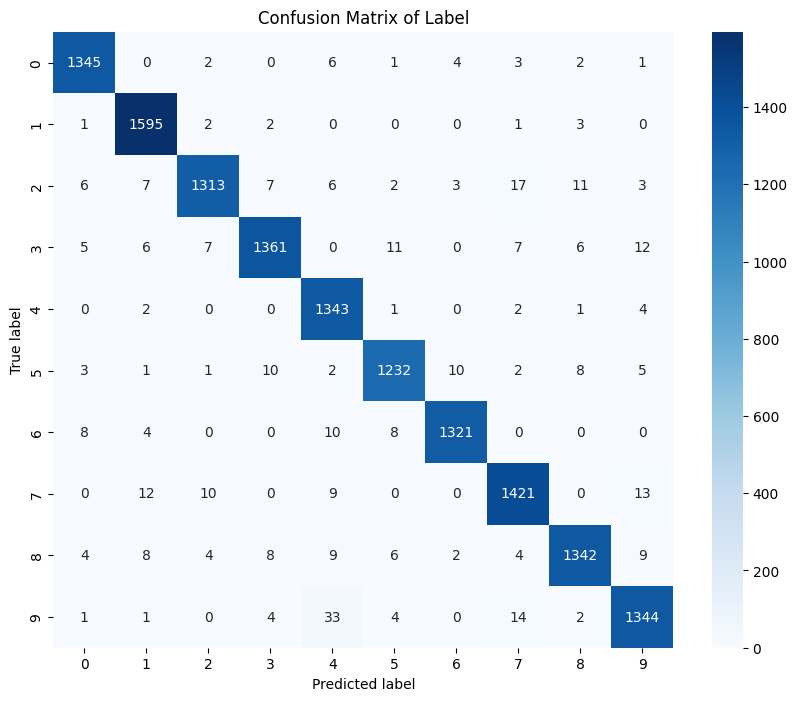

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix of Label')
plt.show()